In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

In [2]:
np.random.seed(2023)

In [3]:
#general functions
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Choix des données

Le choix de mon jeu de données s'est porté sur "Titanic - Machine Learning from Disaster", disponible sur Kaggle. Deux raisons ont motivé cette décision. Tout d'abord, les données sont relativement simples à appréhender, puisqu'elles se présentent sous forme de tableaux, à l'instar de celles que nous utilisons en cours. De plus, la plateforme Kaggle offre un environnement propice à l'apprentissage pour les étudiants en intelligence artificielle, ce qui a renforcé mon choix.

https://www.kaggle.com/competitions/titanic/data

Le jeu de données train se compose d'un tableau de 891 lignes et 11 colonnes portant les noms suivants : **Survived** (la variable à prédire, indiquant si la personne a survécu ou non, avec 1 pour "survécu" et 0 pour "non survécu"), **pclass** (classe du ticket), **Name**, **Sex** (sexe de la personne), **Age**, **SibSp** (nombre de frères/soeurs ou conjoints à bord), **Parch** (nombre de parents ou d'enfants à bord), **Ticket** (numéro du ticket), **Fare** (prix du billet), **Cabin** (numéro de cabine) et **Embarked** (port d'embarquement). Chaque passager est identifié par un identifiant unique. Le jeu de données test, quant à lui, est constitué de 418 lignes pour les mêmes 11 colonnes, à l'exception de la colonne **Survived** qui est absente.

In [4]:
train = pd.read_csv('dataKaggle/train.csv', index_col=0)
test = pd.read_csv('dataKaggle/test.csv', index_col=0)

# Visualisations (Exploratory Data Aanalysis)

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#regarde le taux de valeurs manquantes
train.isnull().sum()/train.shape[0]

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [7]:
#supprime Cabin qui a trop de valeurs manquantes
train.drop('Cabin', axis=1, inplace=True)

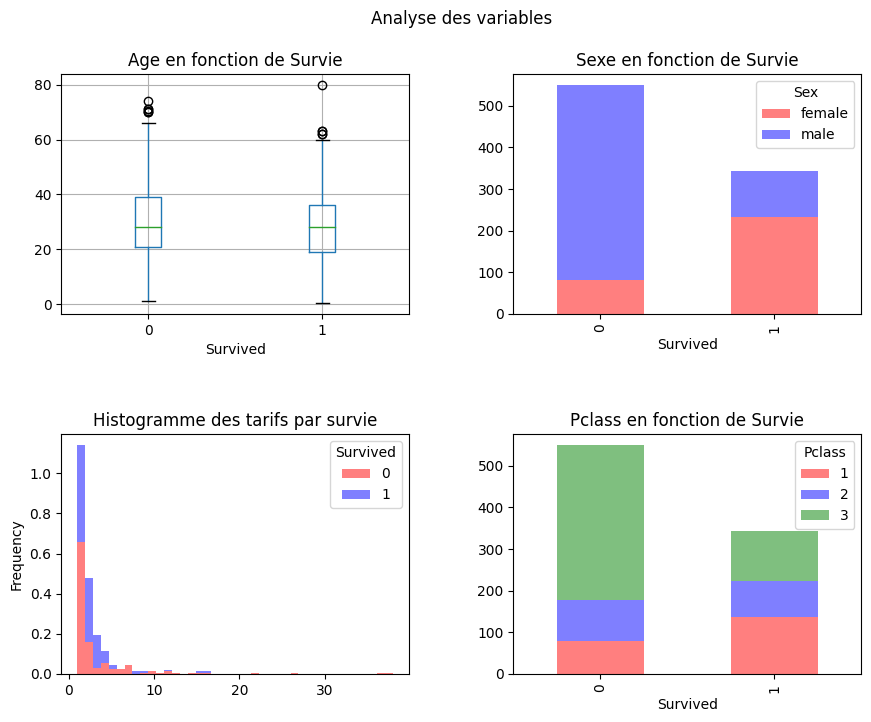

In [8]:
# Créer une figure et quatre sous-figures
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Tracer le premier graphique : boîte à moustaches de l'âge par survie
train.boxplot(column='Age', by='Survived', ax=axs[0, 0])
axs[0, 0].set_title('Age en fonction de Survie')

# Tracer le quatrième graphique : boîte à moustaches de la survie par âge
train.groupby(['Survived', 'Sex'])['Survived'].count().unstack().plot(kind='bar', stacked=True, color=['red', 'blue'], alpha=0.5, ax=axs[0, 1])
axs[0, 1].set_title('Sexe en fonction de Survie')


# Tracer le deuxième graphique : histogramme du tarif par survie
train.groupby(['Fare', 'Survived'])['Fare'].count().unstack().plot(kind='hist', alpha=0.5, bins=40, color=['red', 'blue'], stacked=True, ax=axs[1, 0], density=True)
axs[1, 0].set_title('Histogramme des tarifs par survie')

# Tracer le troisième graphique : boîte à moustaches de la survie par classe
train.groupby(['Survived', 'Pclass'])['Survived'].count().unstack().plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], alpha=0.5, ax=axs[1, 1])
axs[1, 1].set_title('Pclass en fonction de Survie')

# Ajuster l'espacement entre les sous-figures
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Afficher la figure
fig.suptitle("Analyse des variables")
plt.show()

Les graphiques présentés montrent que la survie des passagers du Titanic semble être influencée par plusieurs facteurs. En effet, le ratio de décès par rapport aux survivants est inférieur à 1 pour les femmes, tandis qu'il est supérieur à 1 pour les hommes. De même, on observe que la proportion de survivants est plus élevée dans la classe 1 que dans la classe 3, tandis que la classe 2 se situe à peu près à égalité entre les deux. Cependant, il n'est pas clair que la survie soit directement corrélée au prix du billet, comme l'indique la répartition de l'histogramme. De même, l'âge moyen des survivants ne diffère pas beaucoup de celui des victimes, étant d'environ 30 ans dans les deux cas.

C:\Users\lucas\AppData\Local\Temp\ipykernel_9712\3596124329.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov = train.cov()
C:\Users\lucas\AppData\Local\Temp\ipykernel_9712\3596124329.py:6: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xticks(range(len(train.cov().columns)), train.cov().columns, rotation=90)
C:\Users\lucas\AppData\Local\Temp\ipykernel_9712\3596124329.py:7: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.yticks(range(len(train.cov().columns)), train.co

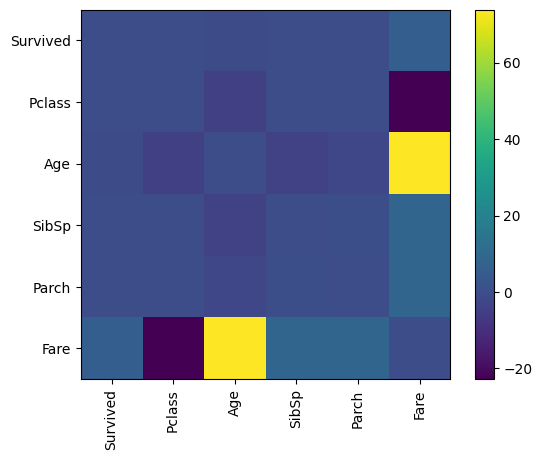

In [9]:
cov = train.cov()
for i in range(cov.shape[0]):
    cov.iloc[i,i] = 0
plt.figure()
plt.imshow(cov, cmap='viridis', interpolation='nearest')
plt.xticks(range(len(train.cov().columns)), train.cov().columns, rotation=90)
plt.yticks(range(len(train.cov().columns)), train.cov().columns)
plt.colorbar()
plt.show()

Dans cette matrice de covariance, il ne semble n'y avoir aucune covariance significative entre le paramètre **Survived** et les autres. On retrouve par contre que plus une personne est vieille plus elle achète son billet cher et que plus la classe du billet augmente plus sa valeur diminue.

# Features Engineering

Cette section permet l'application des méthodes de Feature Engineering vues en cours. Une copie de l'ensemble d'entraînement est créée afin de pouvoir comparer les résultats obtenus avec et sans l'utilisation de ces méthodes.

In [10]:
train_ini = train.copy()

In [11]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Le tarif du billet sera normalisé car on voit bien qu'à travers l'histogramme, cette variable ne suit pas une loi normale mais est plus proche d'une loi de poisson/chi-2. Les valeurs extrêmes peuvent donc enfluencé dans certains modèles qu'on utilisera (tous hors RandomForest). On remplace aussi les NaN par la moyenne pour **Age** ou par la valeur la plus fréquente pour **Embarked** car certains modèles n'acceptent pas de NaN en entrés. Enfin, ne savant pas faire de features engineering sur des strings aussi complexes que les noms et les tickets, les variables **Name** et **Ticket** seront arbitrairement supprimées.

In [12]:
#normalisation des données Fare
train['Fare'] = (train['Fare'] - train['Fare'].mean())/train['Fare'].std()
#normalisation des données Age
train['Age'] = (train['Age'] - train['Age'].mean())/train['Age'].std()
#remplace les NaN dans Age par la moyenne de la colonne
train['Age'].fillna(train['Age'].mean(), inplace=True)
#remplace les NaN dans Embarked par la valeur la plus fréquente
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True)
#enlève les colonnes Name et Ticket
train.drop(['Name', 'Ticket'], axis=1, inplace=True)

De plus, il semble approprié d'appliquer un encodage one-hot aux variables **Embarked** et **Pclass** car elles ont un nombre fini et restreint de valeurs possibles. En revanche, la variable **Sex** sera encodée binairement car elle n'a que deux valeurs possibles (homme ou femme) comme les variables **Survived**, **SibSp** et **Parch**. On supprime aussi une des colonnes créée par chaque one-hot encoding, cela ne conduit pas à une perte d'informations et permet de garder la matrice identifiable.

In [13]:
train = pd.get_dummies(train, columns=['Sex','Pclass', 'Embarked'])
train.drop(['Sex_female', 'Pclass_2', 'Embarked_C'],axis=1, inplace=True)
train.rename(columns={'Sex_male':'Sex'}, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,Sex,Pclass_1,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,-0.530005,1,0,-0.502163,1,0,1,0,1
2,1,0.571430,1,0,0.786404,0,1,0,0,0
3,1,-0.254646,0,0,-0.488580,0,0,1,0,1
4,1,0.364911,1,0,0.420494,0,1,0,0,1
5,0,0.364911,0,0,-0.486064,1,0,1,0,1


# Benchmerks

## Linear Models

Il est probable que les résultats obtenus ne soient pas optimaux car, comme le montre la figure suivante, il n'y a pas de corrélation linéaire évidente entre **Survived** et certaines de ses variables. Cela peut poser problème pour les modèles de régression linéaire qui sont sensibles à ce type de relation. Il est donc important d'explorer d'autres types de modèles plus adaptés à cette situation.

c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


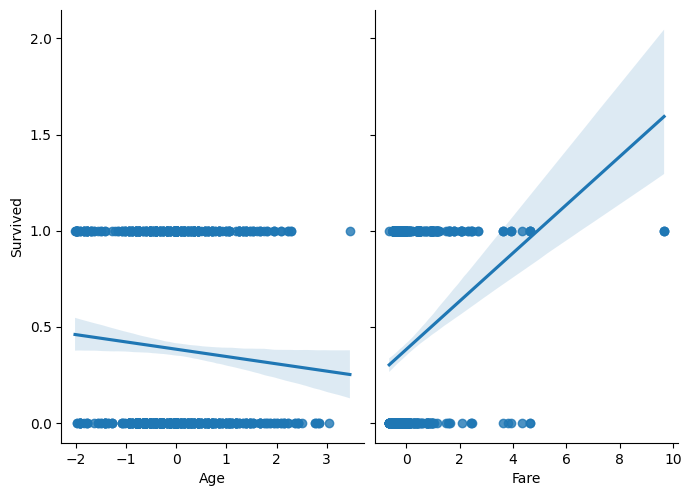

In [14]:
sns.pairplot(train, x_vars=['Age','Fare'], y_vars='Survived', height=7, aspect=0.7, kind='reg', size=5)

Best threshold :  [0.63157895]
Misclassification error :  18.41 %


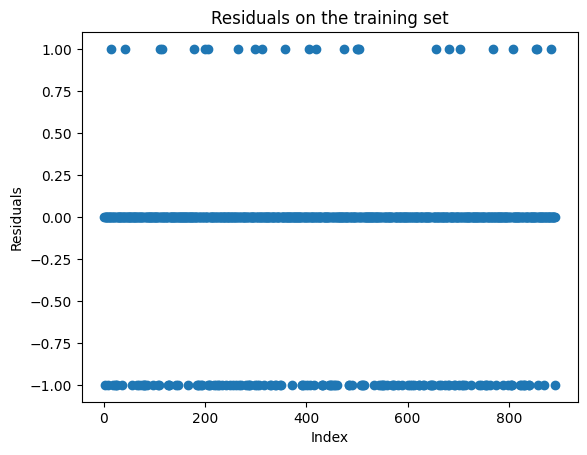

In [15]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (not float values can't be used)
linreg.fit(train.drop(['Survived'],  axis = 1), train['Survived'])

# make 10-folds cross validation for find the best threshold
S = np.linspace(0,1,20)
K = np.arange(1,10)
acc = np.zeros((len(S), len(K)))
for k in K:
     # index of validation set
    ind = np.random.randint(0, 10, len(train))
    # validation set
    val = train.iloc[ind == k]
    # training set
    train_temp = train.iloc[ind != k]

    for s in S:
        pred = (linreg.predict(train_temp.drop(['Survived'],  axis = 1))>s).astype(int)
        acc[S==s, K==k] = metrics.accuracy_score(train_temp['Survived'], pred)

# get the best threshold
s = S[acc.mean(axis=1) == acc.mean(axis=1).max()]
print('Best threshold : ', s)
#make prediction
pred = (linreg.predict(train.drop(['Survived'],  axis = 1))>s).astype(int)
# make residuals
res = pred-train['Survived'] 

# plot the residuals
plt.plot(res, 'o')
plt.title('Residuals on the training set')
plt.xlabel('Index')
plt.ylabel('Residuals')

#print misclassification error
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred), 4)*100, '%')

Confusion matrix, without normalization
[[524  25]
 [139 203]]


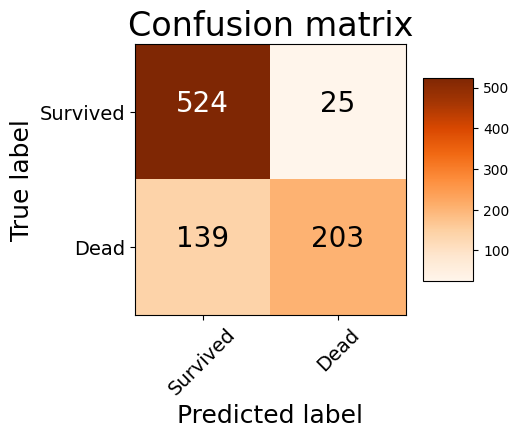

In [16]:
#plot confusion matrix with number of missclassified
cm = confusion_matrix(train['Survived'], pred)
plot_confusion_matrix(cm, classes=['Survived', 'Dead'], title='Confusion matrix')

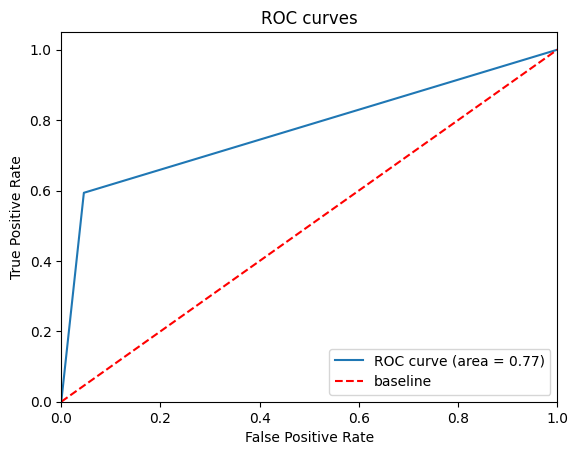

In [17]:
# plot ROC curves with AUC
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

Les résultats obtenus sont étonnamment satisfaisants et cette performance pourra servir de référence de performance minimale pour les autres modèles. 

## Support Vector Machines

Misclassification error :  9.32 %


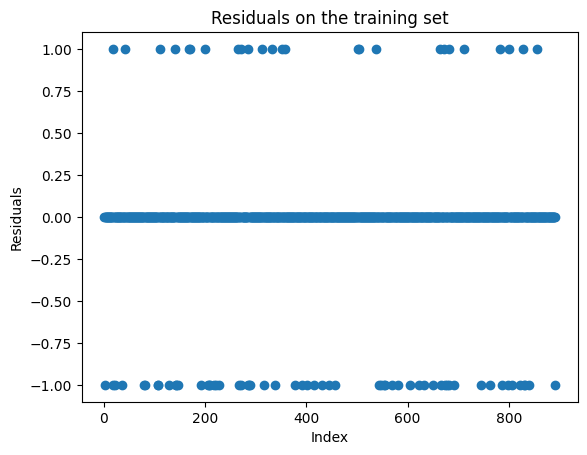

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#create a pipeline to create features, scale data and fit the model
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5)) 
))

#call the pipeline
polynomial_svm_clf.fit(train.drop(['Survived'],  axis = 1),train['Survived'])


# make residuals of the model
pred = polynomial_svm_clf.predict(train.drop(['Survived'],  axis = 1))
res = pred-train['Survived']

plt.plot(res, 'o')
plt.title('Residuals on the training set')
plt.xlabel('Index')
plt.ylabel('Residuals')

#print misclassification error
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred), 4)*100, '%')

Confusion matrix, without normalization
[[524  25]
 [ 58 284]]


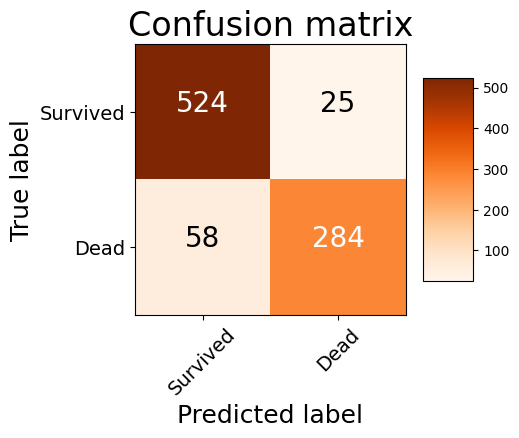

In [19]:
#plot confusion matrix with number of misclassified
cm = confusion_matrix(train['Survived'], pred)
plot_confusion_matrix(cm, classes=['Survived', 'Dead'], title='Confusion matrix')

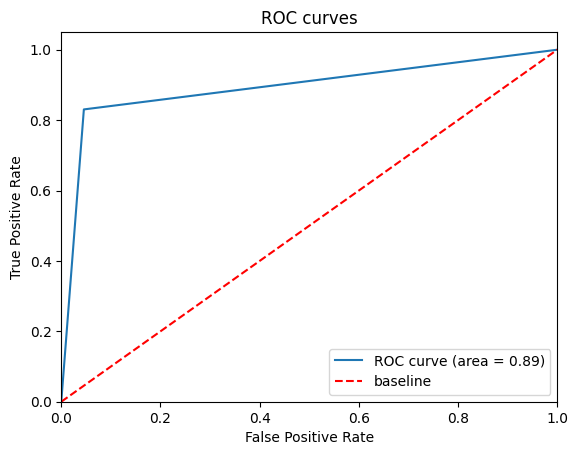

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

## Random Forest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


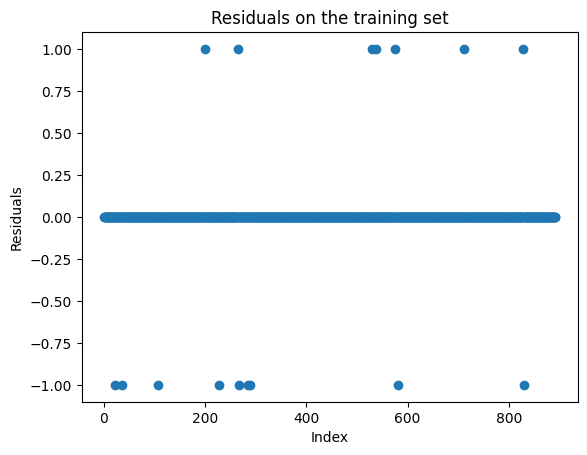

Misclassification error :  1.7999999999999998 %


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[P

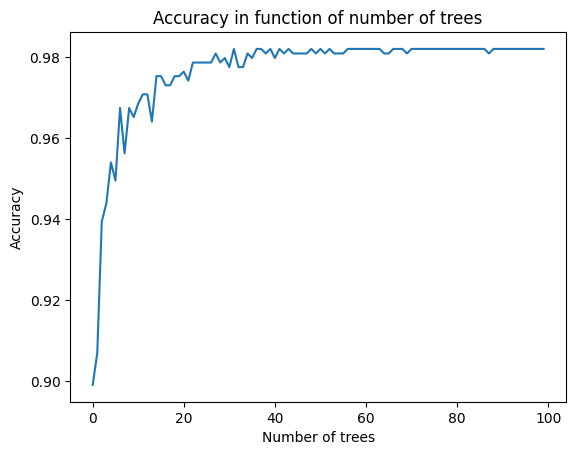

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 500 trees
rf = RandomForestClassifier(n_estimators=100,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
rf.fit(train.drop(['Survived'],  axis = 1),train['Survived'])

# make predictions
pred = rf.predict(train.drop(['Survived'],  axis = 1))
#make residuals
res = pred-train['Survived']

# plot the residuals
plt.figure()
plt.plot(res, 'o')
plt.title('Residuals on the training set')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

#print misclassification error
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred), 4)*100, '%')

#plot accuracy in function of number of trees
acc = np.zeros(100)
for i in range(100):
    rf = RandomForestClassifier(n_estimators=i+1,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
    rf.fit(train.drop(['Survived'],  axis = 1),train['Survived'])
    pred = rf.predict(train.drop(['Survived'],  axis = 1))
    acc[i] = metrics.accuracy_score(train['Survived'], pred)
plt.figure()
plt.plot(acc)
plt.title('Accuracy in function of number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()

Confusion matrix, without normalization
[[544   5]
 [ 11 331]]


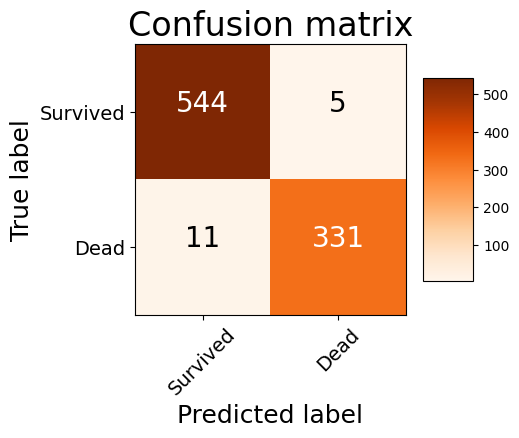

In [22]:
#plot confusion matrix with number of misclassified
cm = confusion_matrix(train['Survived'], pred)
plot_confusion_matrix(cm, classes=['Survived', 'Dead'], title='Confusion matrix')

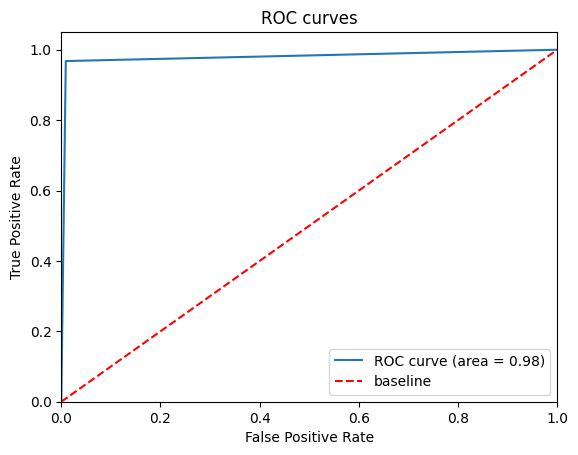

In [23]:
# plot ROC curves with AUC
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

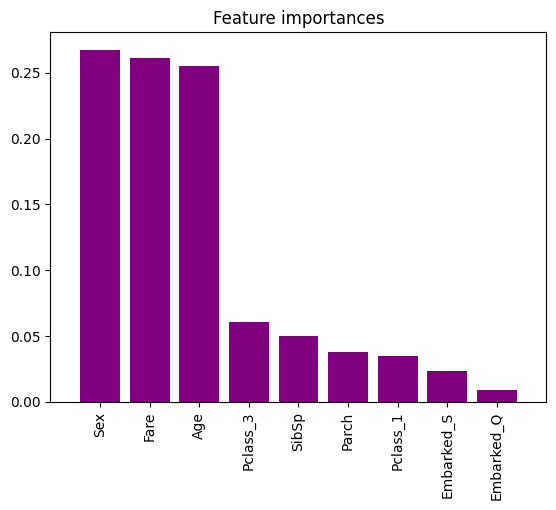

In [24]:
# plot feature importance arrange in ascending order
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.drop(['Survived'],  axis = 1).shape[1]), importances[indices],
         color="purple", align="center")
plt.xticks(range(train.drop(['Survived'],  axis = 1).shape[1]), train.drop(['Survived'],  axis = 1).columns[indices], rotation=90)
plt.xlim([-1, train.drop(['Survived'],  axis = 1).shape[1]])
plt.show()

### Random Forest Optimization through Random Search

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found:  {'n_estimators': 40, 'min_samples_split': 10, 'max_leaf_nodes': 49, 'max_features': 0.5, 'max_depth': 9, 'bootstrap': True}


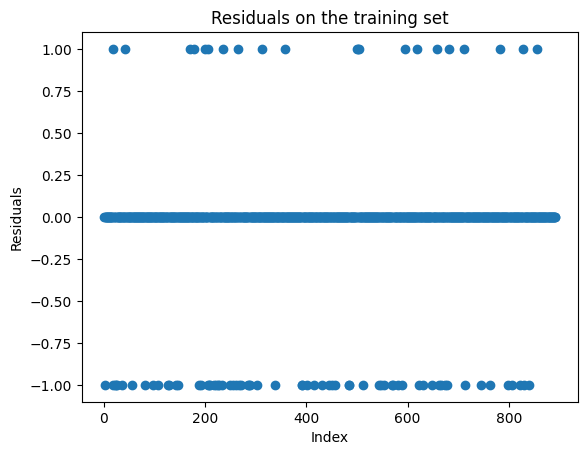

Misclassification error :  9.879999999999999 %


In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 500).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier()

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 10, 
                        n_iter = 100, verbose = 1 )

# Fit 
rs.fit(train.drop(['Survived'],  axis = 1),train['Survived'])

# Print the best parameters
print('Best parameters found: ', rs.best_params_)

best_rf = rs.best_estimator_

#make predictions
pred = best_rf.predict(train.drop(['Survived'],  axis = 1))
#make residuals
res = pred-train['Survived']

# plot the residuals
plt.figure()
plt.plot(res, 'o')
plt.title('Residuals on the training set')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

#print misclassification error
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred), 4)*100, '%')

Confusion matrix, without normalization
[[528  21]
 [ 67 275]]


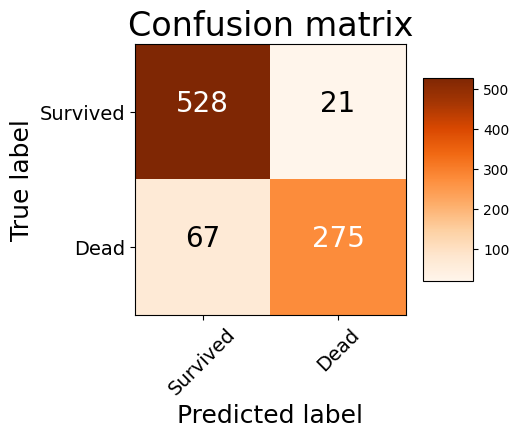

In [26]:
#plot confusion matrix with number of misclassified
cm = confusion_matrix(train['Survived'], pred)
plot_confusion_matrix(cm, classes=['Survived', 'Dead'], title='Confusion matrix')

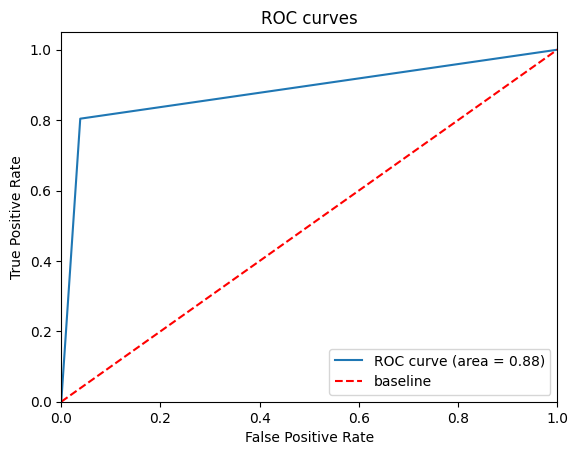

In [27]:
# plot ROC curves with AUC
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

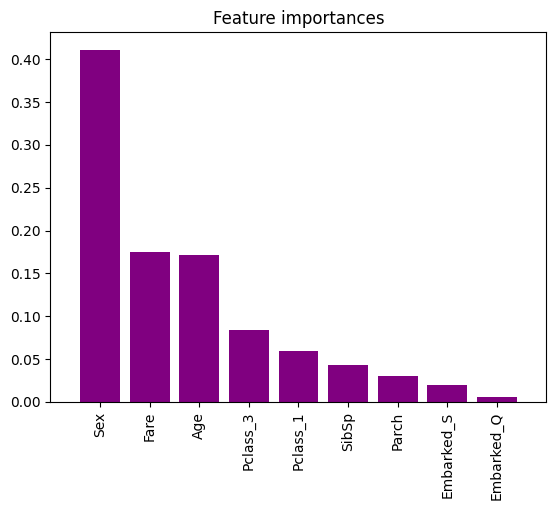

In [28]:
# plot feature importance arrange in ascending order
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.drop(['Survived'],  axis = 1).shape[1]), importances[indices],
            color="purple", align="center")
plt.xticks(range(train.drop(['Survived'],  axis = 1).shape[1]), train.drop(['Survived'],  axis = 1).columns[indices], rotation=90)
plt.xlim([-1, train.drop(['Survived'],  axis = 1).shape[1]])
plt.show()

Il est étonnant que l'optimisation des hyperparamètres par Cross Validation ait conduit à une diminution de la précision de notre modèle, d'autant plus que les paramètres initiaux étaient compris dans les plages testées lors de la Cross Validation. Cela pourrait s'expliquer par le fait que la fonction *RandomForestClassifier()* effectue déjà une sorte de Cross Validation sur les paramètres non spécifiés, et leur imposition pourrait être moins performante. Il faudrait approfondir cette hypothèse.

## Boosting

### AdaBoost

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found:  {'learning_rate': 0.17}


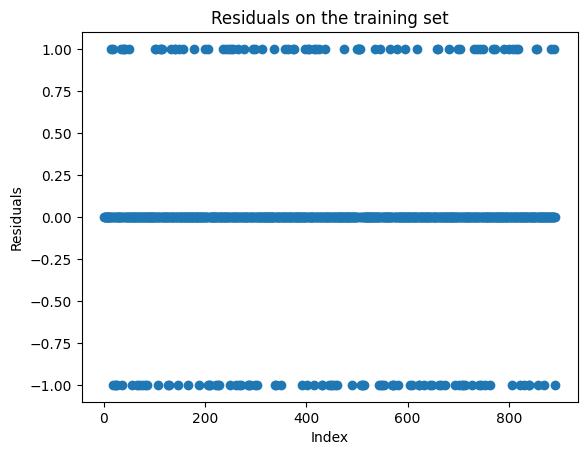

Misclassification error :  17.96 %


In [29]:
#import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=100)

# Make CV to find the best learning rate
param_grid = {'learning_rate': np.linspace(0.01, 1, 100)}
grid = RandomizedSearchCV(ada, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 10, 
                        n_iter = 100, verbose = 1)
grid.fit(train.drop(['Survived'],  axis = 1),train['Survived'])
print('Best parameters found: ', grid.best_params_)
best_ada = grid.best_estimator_


# Train Adaboost Classifer
ada = best_ada.fit(train.drop(['Survived'],  axis = 1),train['Survived'])

#make predictions
pred = ada.predict(train.drop(['Survived'],  axis = 1))
#make residuals
res = pred-train['Survived']

# plot the residuals
plt.figure()
plt.plot(res, 'o')
plt.title('Residuals on the training set')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

#print misclassification error
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred), 4)*100, '%')

Confusion matrix, without normalization
[[475  74]
 [ 86 256]]


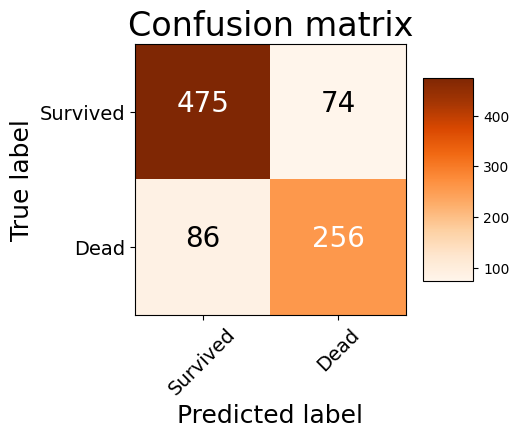

In [30]:
#plot confusion matrix with number of misclassified
cm = confusion_matrix(train['Survived'], pred)
plot_confusion_matrix(cm, classes=['Survived', 'Dead'], title='Confusion matrix')

Text(0.5, 1.0, 'ROC curves')

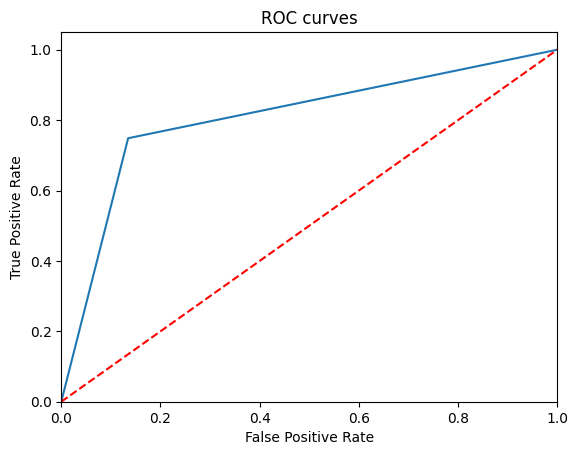

In [31]:
# plot ROC curves with AUC
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')

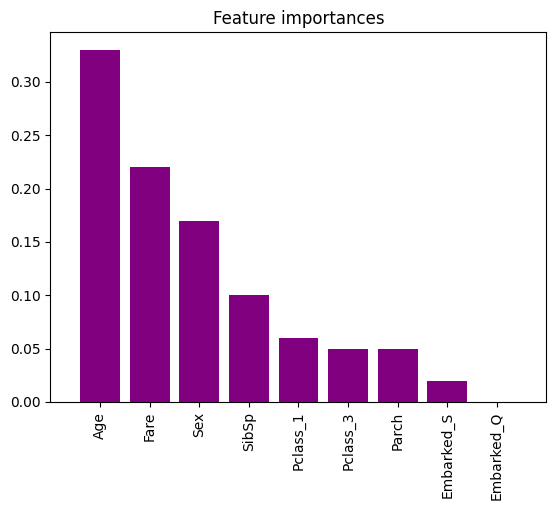

In [32]:
#plot feature importance arrange in ascending order
importances = ada.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.drop(['Survived'],  axis = 1).shape[1]), importances[indices],
            color="purple", align="center")
plt.xticks(range(train.drop(['Survived'],  axis = 1).shape[1]), train.drop(['Survived'],  axis = 1).columns[indices], rotation=90)
plt.xlim([-1, train.drop(['Survived'],  axis = 1).shape[1]])
plt.show()

### XGBoost

Fitting 4 folds for each of 3840 candidates, totalling 15360 fits
Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'objective': 'binary:hinge'}
Best score found:  0.8283511372340631
Best estimator found:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binar

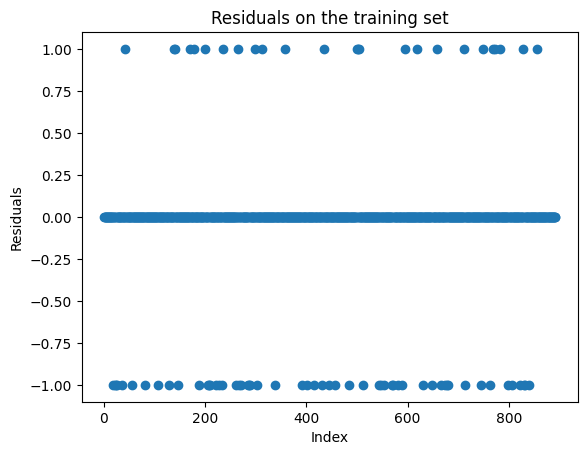

Misclassification error :  8.98 %


In [33]:
# import XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier

# define a model
xgb_model = XGBClassifier()

# define the grid of hyperparameters to search
params = {
            'objective':['binary:hinge'],
            'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ], #so called `eta` value
            'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
            'min_child_weight': [ 1, 3, 5, 7 ],
            'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
            }

# instantiate the classifier           
xgb_cv = GridSearchCV(xgb_model, params, n_jobs = -1,
                        scoring = 'roc_auc', cv = 4,
                        verbose = 1 )

# fit the classifier to the training data
xgb_cv.fit(train.drop(['Survived'], axis=1), train['Survived'])

# print the best parameters
print('Best parameters found: ', xgb_cv.best_params_)

# print the best score
print('Best score found: ', xgb_cv.best_score_)

# print the best estimator
print('Best estimator found: ', xgb_cv.best_estimator_)

# make predictions
pred = xgb_cv.predict(train.drop(['Survived'], axis=1))

#make residuals
res = pred-train['Survived']

# plot the residuals
plt.figure()
plt.plot(res, 'o')
plt.title('Residuals on the training set')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

#print misclassification error
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred), 4)*100, '%')

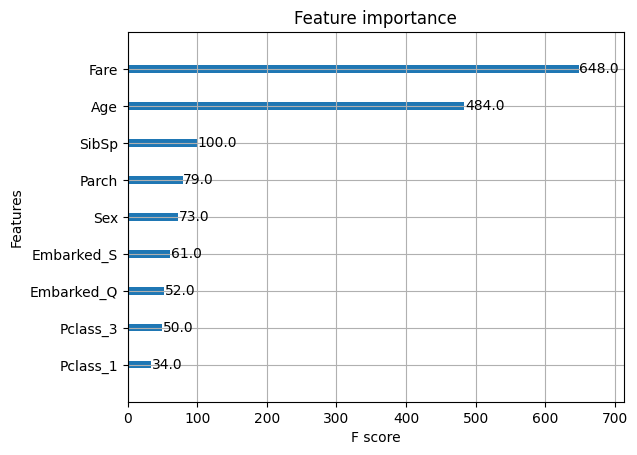

In [34]:
xgb.plot_importance(xgb_cv.best_estimator_)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

Confusion matrix, without normalization
[[524  25]
 [ 55 287]]


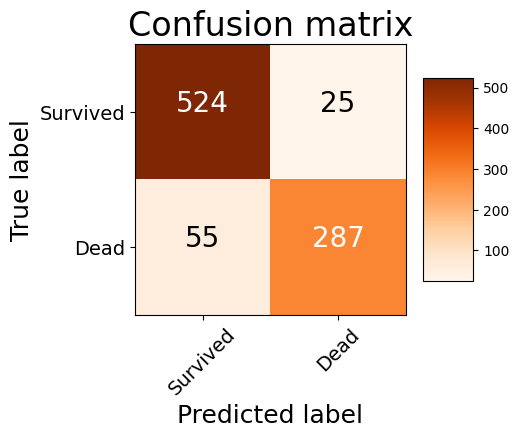

In [35]:
# plot confusion matrix with number of misclassified
cm = confusion_matrix(train['Survived'], pred)
plot_confusion_matrix(cm, classes=['Survived', 'Dead'], title='Confusion matrix')

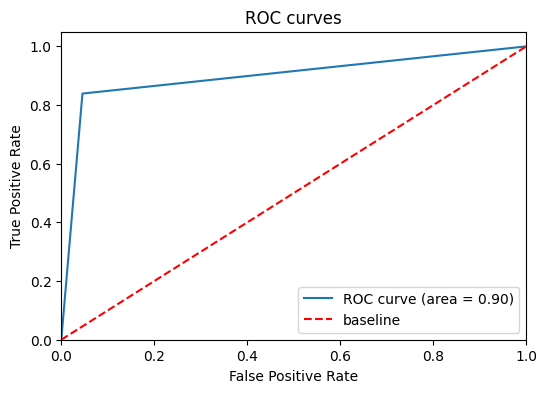

In [36]:
# plot ROC curves with AUC
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

# Discussion

## Qualité du Features Engineering

Le but est ici de déterminer si le feature engineering a eu un impact significatif sur les performances de nos modèles. Pour ce faire, nous allons réutiliser le jeu de données initial de train. Seuls les features engineering appliqués à **Embarked** et **Sex** seront conservés, afin de transformer ces variables qualitatives en variables quantitatives utilisables par nos modèles. En outre, les valeurs manquantes pour **Age** seront remplacées par la médiane et les valeurs manquantes pour **Embarked** seront remplacées par la valeur la plus fréquente.

In [37]:
#enlève les colonnes Name et Ticket
train_ini.drop(['Name', 'Ticket'], axis=1, inplace=True)
#remplacer NaN par la moyenne de la colonne Age
train_ini['Age'].fillna(train_ini['Age'].mean(), inplace=True)
#remplacer NaN par la valeur la plus fréquente de la colonne Embarked
train_ini['Embarked'].fillna(train_ini['Embarked'].value_counts().idxmax(), inplace=True)
#recode Embarked
train_ini['Embarked'] = train_ini['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
#recode Sex
train_ini['Sex'] = train_ini['Sex'].map({'male': 0, 'female': 1})

Misclassification error initiale :  18.52 %
Misclassification error :  18.41 %


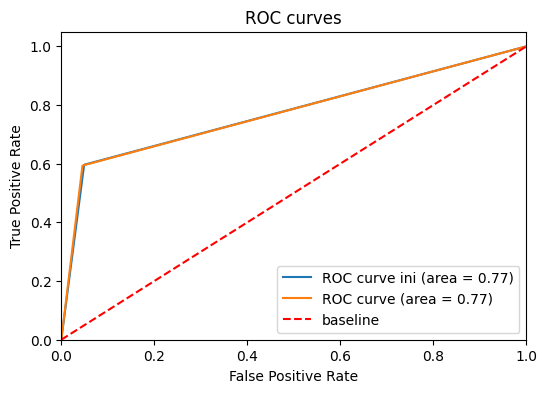

In [38]:
#compare Linear Regression of train and train_ini with curbes ROC and missclassification error

#fit the model
linreg_ini = LinearRegression().fit(train_ini.drop(['Survived'],  axis = 1),train_ini['Survived'])


#make predictions
pred_ini = (linreg_ini.predict(train_ini.drop(['Survived'],  axis = 1))>s).astype(int)
pred_lr = (linreg.predict(train.drop(['Survived'],  axis = 1))>s).astype(int)

#print misclassification error
print('Misclassification error initiale : ', round(1 - metrics.accuracy_score(train_ini['Survived'], pred_ini), 4)*100, '%')
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred_lr), 4)*100, '%')

# plot ROC curves with AUC
fpr_ini, tpr_ini, thresholds_ini = metrics.roc_curve(train_ini['Survived'], pred_ini)
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred_lr)
plt.plot(fpr_ini, tpr_ini, label='ROC curve ini (area = %0.2f)' % metrics.auc(fpr_ini, tpr_ini))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

Misclassification error initiale :  10.77 %
Misclassification error :  9.32 %


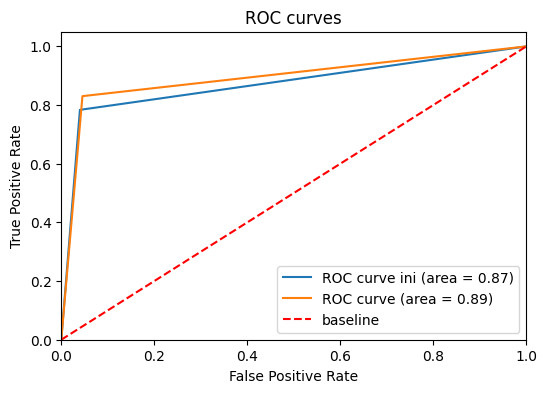

In [39]:
#compare Support Vector Machine of train and train_ini with curbes ROC and missclassification error

#create a pipeline to create features, scale data and fit the model
polynomial_svm_clf_ini = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5)) 
))

#fit the model
polynomial_svm_clf_ini.fit(train_ini.drop(['Survived'],  axis = 1),train_ini['Survived'])

#make predictions
pred_ini = polynomial_svm_clf_ini.predict(train_ini.drop(['Survived'],  axis = 1))
pred_svm = polynomial_svm_clf.predict(train.drop(['Survived'],  axis = 1))

#print misclassification error
print('Misclassification error initiale : ', round(1 - metrics.accuracy_score(train_ini['Survived'], pred_ini), 4)*100, '%')
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred_svm), 4)*100, '%')

# plot ROC curves with AUC
fpr_ini, tpr_ini, thresholds_ini = metrics.roc_curve(train_ini['Survived'], pred_ini)
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred_svm)
plt.plot(fpr_ini, tpr_ini, label='ROC curve ini (area = %0.2f)' % metrics.auc(fpr_ini, tpr_ini))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Misclassification error initiale :  1.7999999999999998 %
Misclassification error :  1.7999999999999998 %


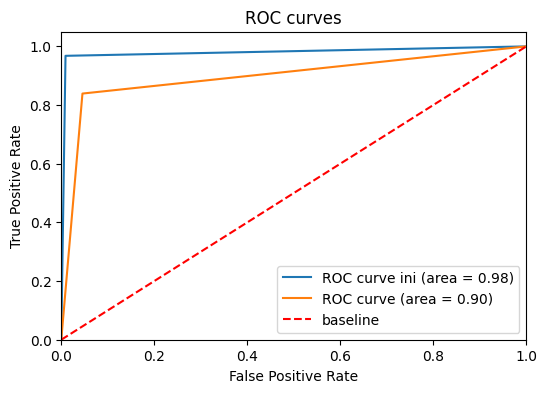

In [40]:
#compare Random Forest of train and train_ini with curbes ROC and missclassification error

#fit the model
rf_ini = RandomForestClassifier(n_estimators=100,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1).fit(train_ini.drop(['Survived'],  axis = 1),train_ini['Survived'])

#make predictions
pred_ini = rf_ini.predict(train_ini.drop(['Survived'],  axis = 1))
pred_rf = rf.predict(train.drop(['Survived'],  axis = 1))

#print misclassification error
print('Misclassification error initiale : ', round(1 - metrics.accuracy_score(train_ini['Survived'], pred_ini), 4)*100, '%')
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred_rf), 4)*100, '%')

# plot ROC curves with AUC
fpr_ini, tpr_ini, thresholds_ini = metrics.roc_curve(train_ini['Survived'], pred_ini)
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred)
plt.plot(fpr_ini, tpr_ini, label='ROC curve ini (area = %0.2f)' % metrics.auc(fpr_ini, tpr_ini))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

Misclassification error initiale :  18.740000000000002 %
Misclassification error :  17.96 %


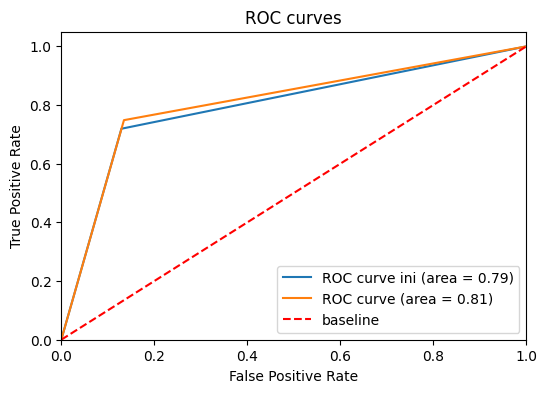

In [41]:
#compare Ada Boost of train and train_ini with curbes ROC and missclassification error

#fit the model
ada_ini = AdaBoostClassifier(**grid.best_params_).fit(train_ini.drop(['Survived'],  axis = 1),train_ini['Survived'])

#make predictions
pred_ini = ada_ini.predict(train_ini.drop(['Survived'],  axis = 1))
pred_ada = ada.predict(train.drop(['Survived'],  axis = 1))

#print misclassification error
print('Misclassification error initiale : ', round(1 - metrics.accuracy_score(train_ini['Survived'], pred_ini), 4)*100, '%')
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred_ada), 4)*100, '%')

# plot ROC curves with AUC
fpr_ini, tpr_ini, thresholds_ini = metrics.roc_curve(train_ini['Survived'], pred_ini)
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred_ada)
plt.plot(fpr_ini, tpr_ini, label='ROC curve ini (area = %0.2f)' % metrics.auc(fpr_ini, tpr_ini))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

Misclassification error initiale :  9.879999999999999 %
Misclassification error :  8.98 %


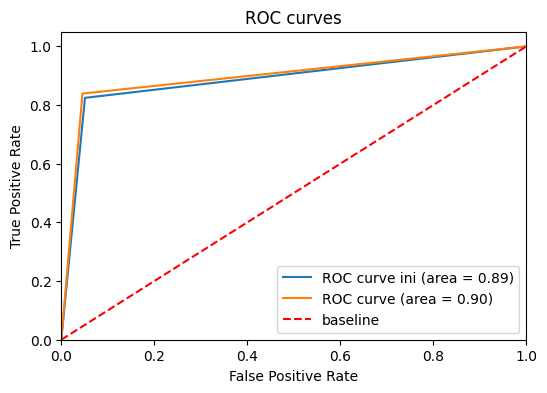

In [42]:
#compare XGBoost of train and train_ini with curbes ROC and missclassification error

#fit the model
xgb_ini = XGBClassifier(**xgb_cv.best_params_).fit(train_ini.drop(['Survived'],  axis = 1),train_ini['Survived'])

#make predictions
pred_ini = xgb_ini.predict(train_ini.drop(['Survived'],  axis = 1))
pred_xgb = xgb_cv.predict(train.drop(['Survived'],  axis = 1))

#print misclassification error
print('Misclassification error initiale : ', round(1 - metrics.accuracy_score(train_ini['Survived'], pred_ini), 4)*100, '%')
print('Misclassification error : ', round(1 - metrics.accuracy_score(train['Survived'], pred_xgb), 4)*100, '%')

# plot ROC curves with AUC
fpr_ini, tpr_ini, thresholds_ini = metrics.roc_curve(train_ini['Survived'], pred_ini)
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred)
plt.plot(fpr_ini, tpr_ini, label='ROC curve ini (area = %0.2f)' % metrics.auc(fpr_ini, tpr_ini))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

Effectivement, les résultats montrent une amélioration globale de la performance du modèle avec le feature engineering appliqué. Bien que l'amélioration soit légère avec une baisse d'environ 1% du taux d'erreur de classification, cela reste significatif et montre l'utilité du feature engineering même sur des données relativement simples comme celles de Titanic. Cette méthode peut s'avérer particulièrement utile pour des jeux de données plus complexes où les relations entre les variables sont moins évidentes.

## Meilleur Modèle 

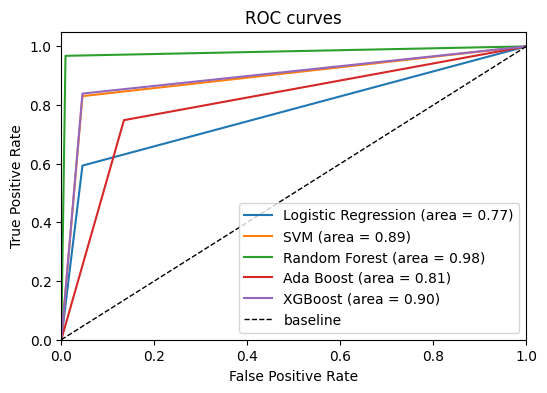

In [43]:
#plot curbes ROC for all models on train
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred_lr)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred_svm)
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred_rf)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred_ada)
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(train['Survived'], pred_xgb)
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--', label='baseline', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

La courbe ROC montre clairement que le modèle RandomForest est de loin le meilleur pour la prédiction dans ce projet. Cependant, il pourrait être intéressant d'explorer des approches d'agrégation d'experts pour améliorer encore davantage la performance de la prédiction. Cependant, à ma connaissance, cela n'a pas encore été implémenté en Python.

## Score Kaggle

In [44]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
#supprime Cabin qui a trop de valeurs manquantes
test.drop('Cabin', axis=1, inplace=True)
#normalisation des données Fare
test['Fare'] = (test['Fare'] - test['Fare'].mean())/test['Fare'].std()
#normalisation des données Age
test['Age'] = (test['Age'] - test['Age'].mean())/test['Age'].std()
#remplace les NaN dans Age par la moyenne de la colonne
test['Age'].fillna(test['Age'].mean(), inplace=True)
#remplace les NaN dans Fare par la moyenne de la colonne
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
#remplace les NaN dans Embarked par la valeur la plus fréquente
test['Embarked'].fillna(test['Embarked'].value_counts().index[0], inplace=True)
#enlève les colonnes Name et Ticket
test.drop(['Name', 'Ticket'], axis=1, inplace=True)
#création de nouvelles colonnes pour les variables catégorielles
test = pd.get_dummies(test, columns=['Sex','Pclass', 'Embarked'])
test.drop(['Sex_female', 'Pclass_2', 'Embarked_C'],axis=1, inplace=True)
test.rename(columns={'Sex_male':'Sex'}, inplace=True)

In [46]:
# utilisations du test set pour prédire les survivants avec la Random Forest sous le format de "gender_submission.csv"
pred_rf = rf.predict(test)
submission = pd.DataFrame({'PassengerId': test.index, 'Survived': pred_rf})
submission.to_csv('submission.csv', index=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Cette dernière partie concerne l'évaluation du modèle sur Kaggle. Pour être rigoureux, le taux de mal classés aurait dû être remplacé par l'erreur de généralisation, estimée par la moyenne des taux de mal classés obtenus avec une validation croisée k-fold. Cependant, étant donné les résultats de la random forest, il a été décidé de la sélectionner comme meilleur modèle. Par conséquent, le score Kaggle obtenu avec ce choix est de : **0,77**

Il est regrettable que les colonnes **Name** et **Ticket** n'aient pas été utilisées dans le modèle, car elles pourraient contenir des informations utiles. Par exemple, le nom de famille peut être utilisé pour distinguer les classes sociales et donc, les prix des billets, qui sont une variable importante dans nos modèles. Cependant, la conversion de ces variables de type string en valeurs numériques est un processus complexe et peut nécessiter des techniques avancées telles que la création d'un réseau de neurones pour attribuer une note de "bourgeoisie" à chaque nom, ou l'utilisation de l'embedding de noms.

## Conclusion

Au cours de ce projet, j'ai appris qu'il est important d'explorer plusieurs approches pour résoudre un problème de classification. J'ai pu constater que chaque algorithme de machine learning a ses propres forces et faiblesses, et qu'il est important de choisir le modèle le plus approprié pour le problème en question. Par exemple, la régression linéaire a produit de mauvais résultats pour la classification des données de Titanic, tandis que la Random Forest s'est avérée être le modèle le plus performant. J'ai également appris que l'optimisation des hyperparamètres peut avoir un impact significatif sur les performances des modèles et qu'il est important de choisir judicieusement les hyperparamètres. Enfin, j'ai découvert des algorithmes de boosting tels que Adaboost et XGBoost qui peuvent améliorer les performances des modèles de base en agrégeant des modèles plus simples mais nécéssitent une meilleure optimisation des hyperparamètres.